spline,B-spline,Bezierによる数値補間

In [89]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [90]:
#3次spline補間
def spline3(x,y,point, deg = 3):
    tck,u = interpolate.splprep([x,y],k=deg,s=0) 
    u = np.linspace(0,1,num=point,endpoint=True)
    spline = interpolate.splev(u,tck)
    X = spline[0]
    Y = spline[1]
    return X,Y

In [91]:
#B-spline補間
def Bspline(x, y, point):
    l = len(x)
    t=np.linspace(0,1,l-2,endpoint=True)
    t=np.append([0,0,0],t)
    t=np.append(t,[1,1,1])
    tck = [t, [x, y], 3]
    u3=np.linspace(0,1,point,endpoint=True)
    
    out = interpolate.splev(u3,tck) 
    X = out[0]
    Y = out[1]
    return X, Y

In [92]:
#Bezier補間
def Bezier(x, y, point):
    l = len(x)
    List_0 = [0]*(l)
    List_1 = [1]*(l)
    t = np.append(List_0, List_1)
    tck = [t, [x, y], l-1]
    u3=np.linspace(0,1,point,endpoint=True)
    
    out = interpolate.splev(u3,tck) 
    X = out[0]
    Y = out[1]
    return X, Y

In [93]:

x = [-5, -4, -1, 1, 3, 4, 6]
y = [-4, 1, 2, -2, -4, 0, 4]

point = 500

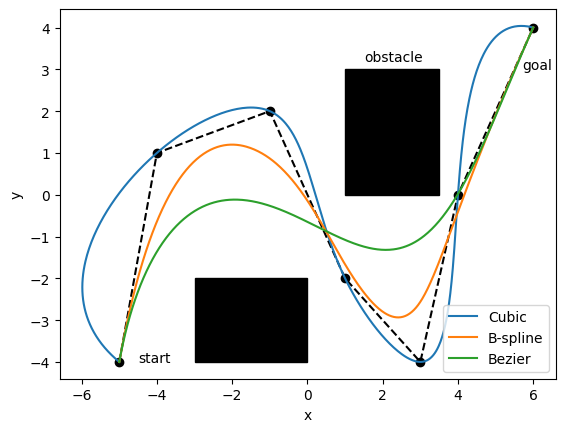

In [101]:
x_3d, y_3d = spline3(x, y, point)
x_B, y_B = Bspline(x, y, point)
x_Bezier, y_Bezier = Bezier(x, y, point)

fig , ax = plt.subplots()

#startpoint,goalpointの記入
ax.text(-4.5, -4, "start")
ax.text(5.7, 3, "goal")

#障害物のオブジェクト
rectangle1 = patches.Rectangle(xy = (-3, -4), width = 3, height = 2, fc = "black", ec = "black")
rectangle2 = patches.Rectangle(xy = (1, 0), width = 2.5, height = 3, fc = "black", ec = "black")
ax.add_patch(rectangle1)
ax.add_patch(rectangle2)
ax.text(1.5, 3.2, "obstacle")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot(x, y, linestyle = "dashed", marker="o", color = "black")
ax.plot(x_3d, y_3d,label="Cubic")
ax.plot(x_B, y_B,label="B-spline")
ax.plot(x_Bezier, y_Bezier,label="Bezier")

plt.legend(loc='lower right')

plt.show()

In [87]:
#経路の曲率を返す関数
#3次spline補間
def curvature_spline3(x, y, point):
    X, Y = spline3(x, y, point)
    dif_X = [now - prev for prev, now in zip(X, X[1:])]
    dif_Y = [now - prev for prev, now in zip(Y, Y[1:])]
    sec_dif_X = [now - prev for prev, now in zip(dif_X, dif_X[1:])]
    sec_dif_Y = [now - prev for prev, now in zip(dif_Y, dif_Y[1:])]
    #曲率kappa
    kappa = []
    for i in range(point-2):
        cal_kappa = abs(dif_X[i] * sec_dif_Y[i] - dif_Y[i] * sec_dif_X[i])/((dif_X[i])**2 + (dif_Y[i])**2)**(3/2)
        kappa.append(cal_kappa)
        
    return kappa

#B-spline補間
def curvature_Bspline(x, y, point):
    X, Y = Bspline(x, y, point)
    dif_X = [now - prev for prev, now in zip(X, X[1:])]
    dif_Y = [now - prev for prev, now in zip(Y, Y[1:])]
    sec_dif_X = [now - prev for prev, now in zip(dif_X, dif_X[1:])]
    sec_dif_Y = [now - prev for prev, now in zip(dif_Y, dif_Y[1:])]
    #曲率kappa
    kappa = []
    for i in range(point-2):
        cal_kappa = abs(dif_X[i] * sec_dif_Y[i] - dif_Y[i] * sec_dif_X[i])/((dif_X[i])**2 + (dif_Y[i])**2)**(3/2)
        kappa.append(cal_kappa)
        
    return kappa

#Bezier補間
def curvature_Bezier(x, y, point):
    X, Y = Bezier(x, y, point)
    dif_X = [now - prev for prev, now in zip(X, X[1:])]
    dif_Y = [now - prev for prev, now in zip(Y, Y[1:])]
    sec_dif_X = [now - prev for prev, now in zip(dif_X, dif_X[1:])]
    sec_dif_Y = [now - prev for prev, now in zip(dif_Y, dif_Y[1:])]
    #曲率kappa
    kappa = []
    for i in range(point-2):
        cal_kappa = abs(dif_X[i] * sec_dif_Y[i] - dif_Y[i] * sec_dif_X[i])/((dif_X[i])**2 + (dif_Y[i])**2)**(3/2)
        kappa.append(cal_kappa)
        
    return kappa


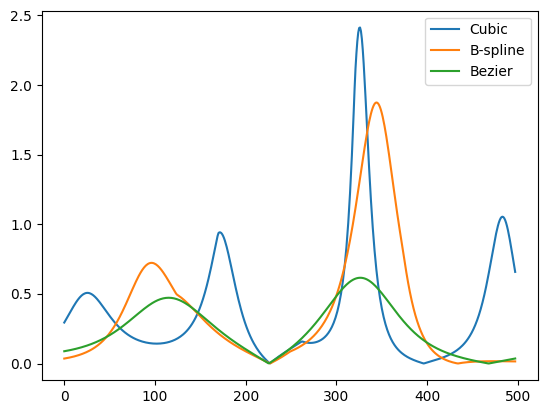

In [88]:
kappa_spline3 = curvature_spline3(x, y, point)
kappa_Bspline = curvature_Bspline(x, y, point)
kappa_Bezier = curvature_Bezier(x, y, point)

plt.plot(kappa_spline3,label="Cubic")
plt.plot(kappa_Bspline, label="B-spline")
plt.plot(kappa_Bezier, label="Bezier")

plt.legend(loc='upper right')

plt.show()